In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

https://xgboost.readthedocs.io/en/stable/tutorials/model.html

In [2]:
df = pd.read_pickle(r'C:\Users\usuario\Documents\12° SEMESTRE\TCC2\data\data_pre_processed.pkl')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,3,8.0,0,0,0


In [3]:
X = df.drop('HeartDisease', axis=1)
y = df[['HeartDisease']]

In [4]:
X_treino, X_teste, y_treino, y_test = train_test_split(X,y, random_state=42)

X_treino.shape, X_teste.shape, y_treino.shape, y_test.shape

((236415, 17), (78806, 17), (236415, 1), (78806, 1))

In [5]:
classificador_RF = RandomForestClassifier()
classificador_DT = DecisionTreeClassifier()
classificador_XGB = xgb.XGBClassifier()

In [6]:
def validacao_cruzada(modelo, X, y, balanceamento):
    kfold = KFold(n_splits=5)

    acuracias = []
    precisao = []
    f1=[]
    recall = []


    for idx, (idx_treino, idx_validacao) in enumerate(kfold.split(X)):
        X_split_treino = X.iloc[idx_treino,:]
        y_split_treino = y.iloc[idx_treino,:]

        if balanceamento=='Oversampling':
            bal = SMOTE(random_state=42)
            X_split_treino, y_split_treino =  bal.fit_resample(X_split_treino, y_split_treino)
        elif balanceamento=='Undersampling':
            bal = RandomUnderSampler(random_state=42)
            X_split_treino, y_split_treino = bal.fit_resample(X_split_treino, y_split_treino)
        elif balanceamento =='SMOTEENN':
            bal = SMOTEENN(random_state=42, sampling_strategy=0.5, n_jobs=-1)
            X_split_treino, y_split_treino = bal.fit_resample(X_split_treino, y_split_treino)
        
        modelo.fit(X_split_treino, y_split_treino.values.flatten())

        X_split_validacao = X.iloc[idx_validacao,:]
        y_split_validacao = y.iloc[idx_validacao,:]

        predicao_validacao = modelo.predict(X_split_validacao)
        
        acuracia_split = accuracy_score(y_split_validacao,predicao_validacao)
        precision_split = precision_score(y_split_validacao,predicao_validacao)
        f1_split = f1_score(y_split_validacao,predicao_validacao)
        recall_split = recall_score(y_split_validacao,predicao_validacao)


        acuracias.append(acuracia_split)
        precisao.append(precision_split)
        f1.append(f1_split)
        recall.append(recall_split)


        print(f'Acurácia do split {idx}: {acuracia_split}')
        print(f'Precisão do split {idx}: {precision_split}')
        print(f'F1 do split {idx}: {f1_split}')
        print(f'Recall do split {idx}: {recall_split}')
        print('')
        
    return modelo

## Avaliando o modelo Decision Tree

### OVERSAMPLING

In [14]:
modelo = validacao_cruzada(classificador_DT, X_treino, y_treino, 'Oversampling')

Acurácia do split 0: 0.8242708795973183
Precisão do split 0: 0.19108461101646793
F1 do split 0: 0.24470502681574405
Recall do split 0: 0.340156684356836

Acurácia do split 1: 0.8250322526066451
Precisão do split 1: 0.19018671298306555
F1 do split 1: 0.24107880011008165
Recall do split 1: 0.32915831663326656

Acurácia do split 2: 0.824207431846541
Precisão do split 2: 0.19217081850533807
F1 do split 2: 0.24518706865237921
Recall do split 2: 0.33860045146726864

Acurácia do split 3: 0.823911342342914
Precisão do split 3: 0.1911976911976912
F1 do split 3: 0.24143586005830903
Recall do split 3: 0.32748393475037074

Acurácia do split 4: 0.8247150138527589
Precisão do split 4: 0.1928276647217874
F1 do split 4: 0.24640843789779956
Recall do split 4: 0.34122387307982877



In [8]:
print (f'A média da acurácia de 5-FOLD é de: {(0.8242708795973183 + 0.8250322526066451 +  0.824207431846541 + 0.823911342342914 +  0.8247150138527589)/5}')
print (f'A média da precisão de 5-FOLD é de: {(0.19108461101646793 + 0.19018671298306555 +  0.19217081850533807 + 0.1911976911976912 + 0.1928276647217874)/5}')
print (f'A média de F1-score de 5-FOLD é de: {(0.24107880011008165 + 0.24518706865237921 +  0.24143586005830903 + 0.24143586005830903 + 0.24640843789779956)/5}')
print (f'A média de Recall de 5-FOLD é de: {(0.340156684356836 + 0.32915831663326656 +  0.33860045146726864 + 0.32748393475037074 + 0.34122387307982877)/5}')

A média da acurácia de 5-FOLD é de: 0.8244273840492354
A média da precisão de 5-FOLD é de: 0.19149349968487
A média de F1-score de 5-FOLD é de: 0.2431092053553757
A média de Recall de 5-FOLD é de: 0.33532465205751416


In [77]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_treino, y_treino)

classificador_DT.fit(X_smote,y_smote)

pred = classificador_DT.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_DT_Oversampling = []
list_results_DT_Oversampling.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

Acurácia de dados de teste: 0.8290485496028221
Precisão de dados de teste: 0.20487719604929638
F1-score de dados de teste: 0.2581497797356828
Recall de dados de teste: 0.3488614377139455


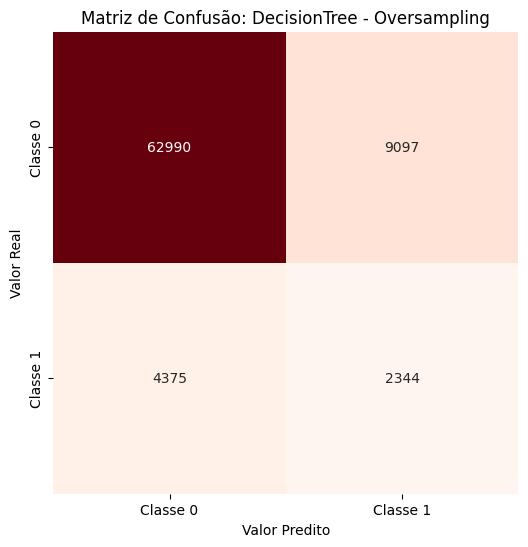

In [78]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: DecisionTree - Oversampling')
plt.show()

In [49]:
#Sensibilidade = 35,2%
#Especificadade = 87,3%
#Erro Tipo 1 - %FP = 12,7%
#Erro Tipo 2 - %FN = 64,8%

In [79]:
feature_importances = classificador_DT.feature_importances_
feature_names = X.columns

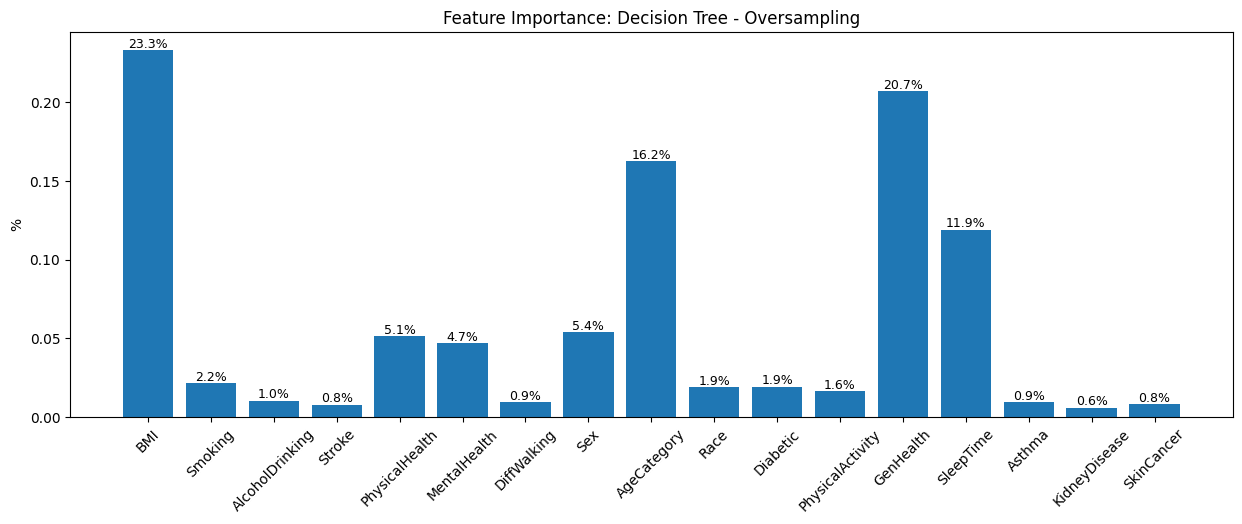

In [80]:
plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Decision Tree - Oversampling')
plt.ylabel('%')
plt.show()

### UNDERSAMPLING

In [15]:
validacao_cruzada(classificador_DT, X_treino, y_treino, 'Undersampling')

Acurácia do split 0: 0.6766914112894697
Precisão do split 0: 0.15861154634205135
F1 do split 0: 0.25614325336966576
Recall do split 0: 0.6651503664392217

Acurácia do split 1: 0.6738362625044942
Precisão do split 1: 0.15646790093772542
F1 do split 1: 0.25237541206127595
Recall do split 1: 0.6520541082164328

Acurácia do split 2: 0.6702620392107099
Precisão do split 2: 0.15684882895670688
F1 do split 2: 0.253840631730079
Recall do split 2: 0.6651617757712566

Acurácia do split 3: 0.6738785610050124
Precisão do split 3: 0.1597056007659167
F1 do split 3: 0.25715386838809134
Recall do split 3: 0.6596638655462185

Acurácia do split 4: 0.673265232747499
Precisão do split 4: 0.15700454219459717
F1 do split 4: 0.2537796454620103
Recall do split 4: 0.6615462100226643



DecisionTreeClassifier()

In [50]:
print (f'A média da acurácia de 5-FOLD é de: {(0.6766914112894697 + 0.6738362625044942 +  0.6702620392107099 + 0.6738785610050124 +  0.673265232747499)/5}')
print (f'A média da precisão de 5-FOLD é de: {(0.15861154634205135 + 0.15646790093772542 +  0.15684882895670688 + 0.1597056007659167 + 0.15700454219459717)/5}')
print (f'A média de F1-score de 5-FOLD é de: {(0.25614325336966576 + 0.25237541206127595 +  0.253840631730079 + 0.25715386838809134 + 0.2537796454620103)/5}')
print (f'A média de Recall de 5-FOLD é de: {(0.6651503664392217 + 0.6520541082164328 +  0.6651617757712566 + 0.6596638655462185 + 0.6615462100226643)/5}')

A média da acurácia de 5-FOLD é de: 0.6735867013514371
A média da precisão de 5-FOLD é de: 0.1577276838393995
A média de F1-score de 5-FOLD é de: 0.2546585622022245
A média de Recall de 5-FOLD é de: 0.6607152651991587


In [82]:
under = RandomUnderSampler(random_state=42)
X_under, y_under = under.fit_resample(X_treino, y_treino)

classificador_DT.fit(X_under,y_under)

pred = classificador_DT.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_DT_Undersampling = []
list_results_DT_Undersampling.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

Acurácia de dados de teste: 0.6756719031545821
Precisão de dados de teste: 0.16039368375513735
F1-score de dados de teste: 0.25823490147139916
Recall de dados de teste: 0.66215210596815


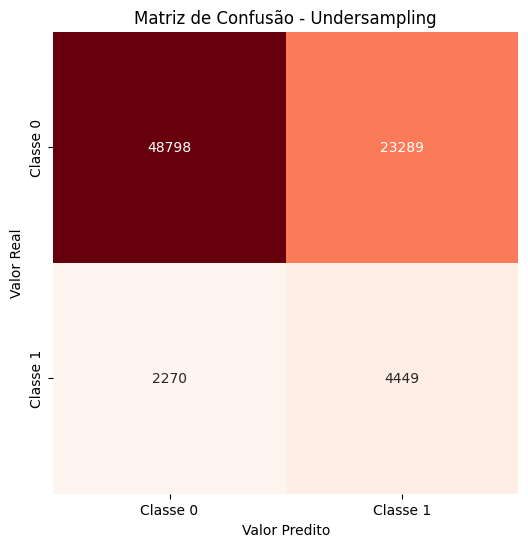

In [83]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Undersampling')
plt.show()

In [53]:
#Sensibilidade = 66,5%
#Especificadade = 67,7%
#Erro Tipo 1 - %FP = 32,3%
#Erro Tipo 2 - %FN = 33,5%

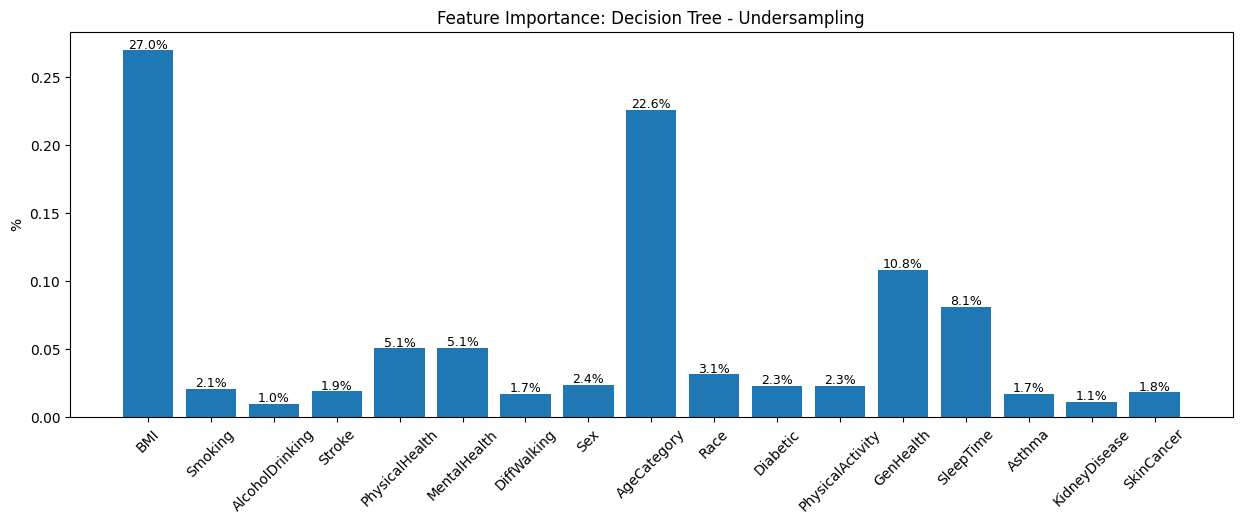

In [84]:
feature_importances = classificador_DT.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Decision Tree - Undersampling')
plt.ylabel('%')
plt.show()

### SEM BALANCEAMENTO

In [19]:
validacao_cruzada(classificador_DT, X_treino, y_treino, 'None')

Acurácia do split 0: 0.8643487088382716
Precisão do split 0: 0.22161794697484705
F1 do split 0: 0.2336917562724014
Recall do split 0: 0.24715693707354056

Acurácia do split 1: 0.8671615591227291
Precisão do split 1: 0.22936864506975643
F1 do split 1: 0.23598102420630093
Recall do split 1: 0.24298597194388777

Acurácia do split 2: 0.8637776790812766
Precisão do split 2: 0.22997359154929578
F1 do split 2: 0.24498886414253898
Recall do split 2: 0.2621018309505894

Acurácia do split 3: 0.8659983503584798
Precisão do split 3: 0.24153498871331827
F1 do split 3: 0.2524775837659274
Recall do split 3: 0.26445872466633713

Acurácia do split 4: 0.8677748873802423
Precisão do split 4: 0.23470574552221446
F1 do split 4: 0.24401451027811366
Recall do split 4: 0.254092168219592



DecisionTreeClassifier()

In [54]:
print (f'A média da acurácia de 5-FOLD é de: {(0.8643487088382716 + 0.8671615591227291 +  0.8637776790812766 + 0.8659983503584798 +  0.8677748873802423)/5}')
print (f'A média da precisão de 5-FOLD é de: {(0.22161794697484705 + 0.22936864506975643 +  0.22997359154929578 + 0.24153498871331827 + 0.23470574552221446)/5}')
print (f'A média de F1-score de 5-FOLD é de: {(0.2336917562724014 + 0.23598102420630093 +  0.24498886414253898 + 0.2524775837659274 + 0.24401451027811366)/5}')
print (f'A média de Recall de 5-FOLD é de: {(0.24715693707354056 + 0.24298597194388777 +  0.2621018309505894 + 0.26445872466633713 + 0.254092168219592)/5}')

A média da acurácia de 5-FOLD é de: 0.8658122369561999
A média da precisão de 5-FOLD é de: 0.23144018356588641
A média de F1-score de 5-FOLD é de: 0.24223074773305647
A média de Recall de 5-FOLD é de: 0.2541591265707893


In [85]:
classificador_DT.fit(X_treino,y_treino)

pred = classificador_DT.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_DT_SemBal = []
list_results_DT_SemBal.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

Acurácia de dados de teste: 0.8644773240616197
Precisão de dados de teste: 0.22648805413616904
F1-score de dados de teste: 0.2349570200573066
Recall de dados de teste: 0.24408394106265813


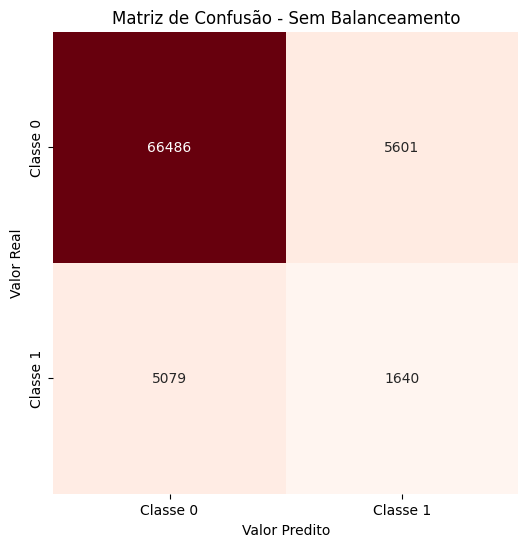

In [86]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Sem Balanceamento')
plt.show()

In [58]:
#Sensibilidade = 25,2%
#Especificadade = 92,2%
#Erro Tipo 1 - %FP = 7,8%
#Erro Tipo 2 - %FN = 74,8%

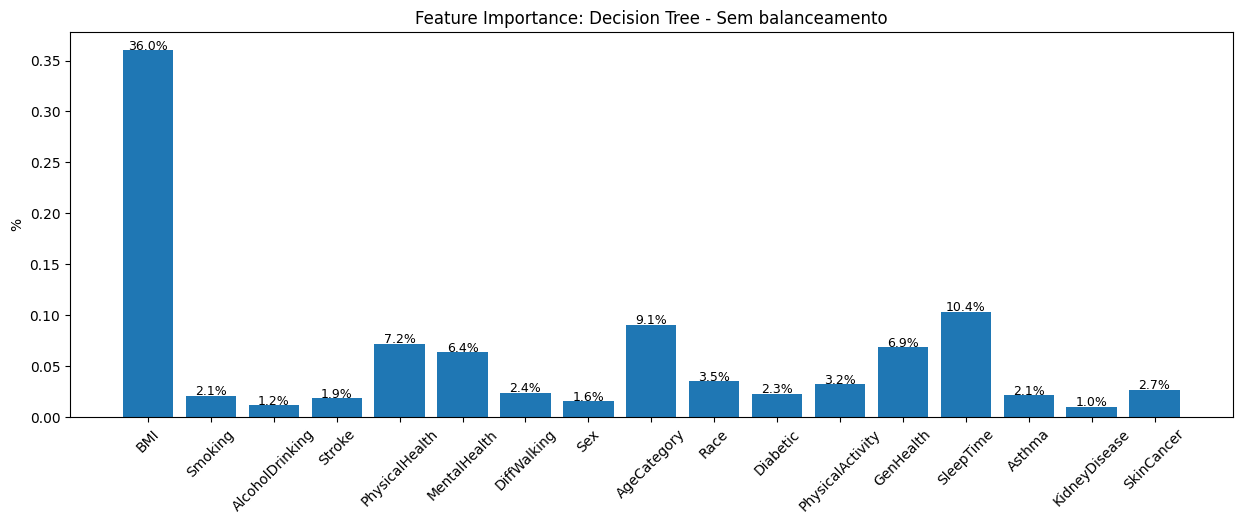

In [45]:
feature_importances = classificador_DT.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Decision Tree - Sem balanceamento')
plt.ylabel('%')
plt.show()

### SMOTEENN

In [20]:
validacao_cruzada(classificador_DT, X_treino, y_treino, 'SMOTEENN')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 0: 0.8037984053465305
Precisão do split 0: 0.21074380165289255
F1 do split 0: 0.29468562305177526
Recall do split 0: 0.489764973464746



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 1: 0.8043694351035255
Precisão do split 1: 0.21027110425391227
F1 do split 1: 0.29205571712842493
Recall do split 1: 0.4779559118236473



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 2: 0.8015777340693272
Precisão do split 2: 0.2103511220874047
F1 do split 2: 0.29458646616541356
Recall do split 2: 0.49134687735139204



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 3: 0.8029312860859082
Precisão do split 3: 0.21266623065184218
F1 do split 3: 0.29515885022692895
Recall do split 3: 0.4822046465645082



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 4: 0.8021064653258042
Precisão do split 4: 0.21344967014258354
F1 do split 4: 0.30009723988331216
Recall do split 4: 0.5051624276001008



DecisionTreeClassifier()

In [59]:
print (f'A média da acurácia de 5-FOLD é de: {(0.8037984053465305 + 0.8043694351035255 +  0.8015777340693272 + 0.8029312860859082 +  0.8021064653258042)/5}')
print (f'A média da precisão de 5-FOLD é de: {(0.21074380165289255 + 0.21027110425391227 +  0.2103511220874047 + 0.21266623065184218 + 0.21344967014258354)/5}')
print (f'A média de F1-score de 5-FOLD é de: {(0.29468562305177526 + 0.29205571712842493 +  0.29458646616541356 + 0.29515885022692895 + 0.30009723988331216)/5}')
print (f'A média de Recall de 5-FOLD é de: {(0.489764973464746 + 0.4779559118236473 +  0.49134687735139204 + 0.4822046465645082 + 0.5051624276001008)/5}')

A média da acurácia de 5-FOLD é de: 0.8029566651862192
A média da precisão de 5-FOLD é de: 0.21149638575772706
A média de F1-score de 5-FOLD é de: 0.29531677929117095
A média de Recall de 5-FOLD é de: 0.48928696736087884


In [87]:
smoteenn = SMOTEENN(random_state=42, sampling_strategy=0.5, n_jobs=-1)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_treino, y_treino)

classificador_DT.fit(X_smoteenn,y_smoteenn)

pred = classificador_DT.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_DT_SMOTEENN = []
list_results_DT_SMOTEENN.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia de dados de teste: 0.8046087861330355
Precisão de dados de teste: 0.21694605700867522
F1-score de dados de teste: 0.30167800453514737
Recall de dados de teste: 0.49501413900878105


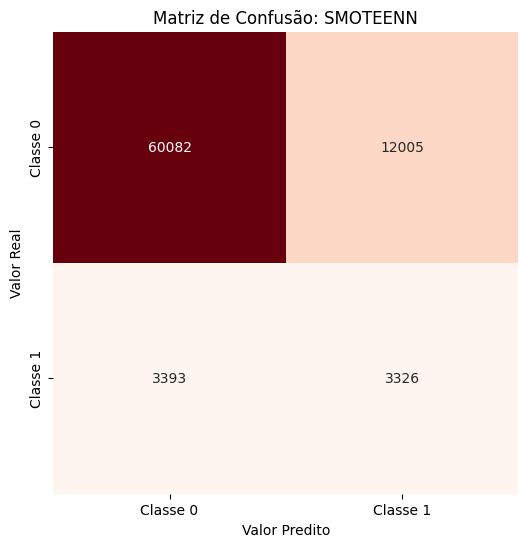

In [88]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: SMOTEENN')
plt.show()

In [ ]:
#Sensibilidade = 49,6%
#Especificadade = 83,4%
#Erro Tipo 1 - %FP = 16,6%
#Erro Tipo 2 - %FN = 50,4%

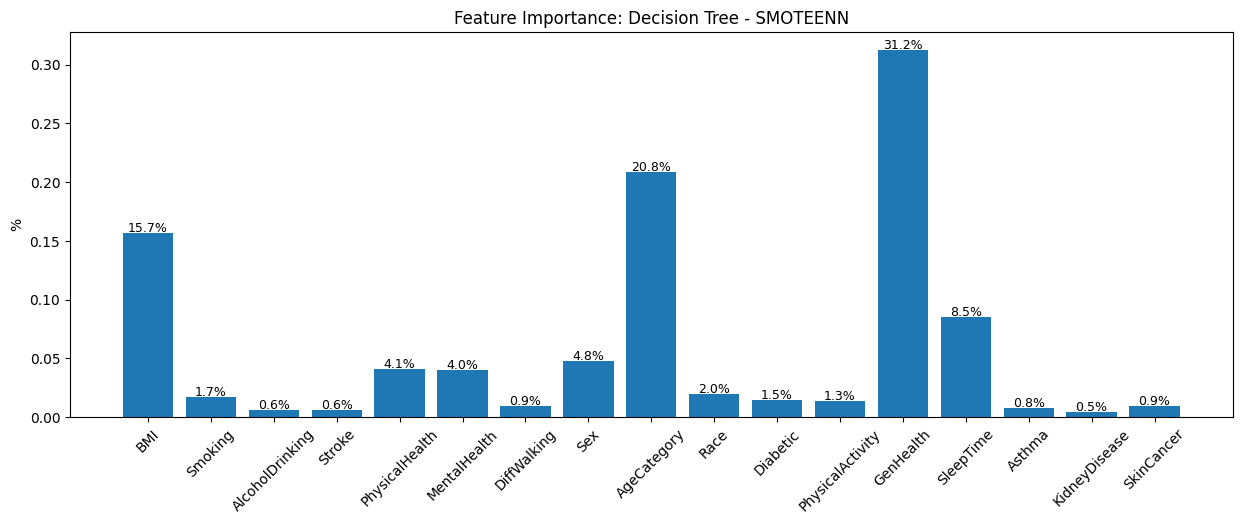

In [89]:
feature_importances = classificador_DT.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Decision Tree - SMOTEENN')
plt.ylabel('%')
plt.show()

### Avaliação Final: Decision Tree

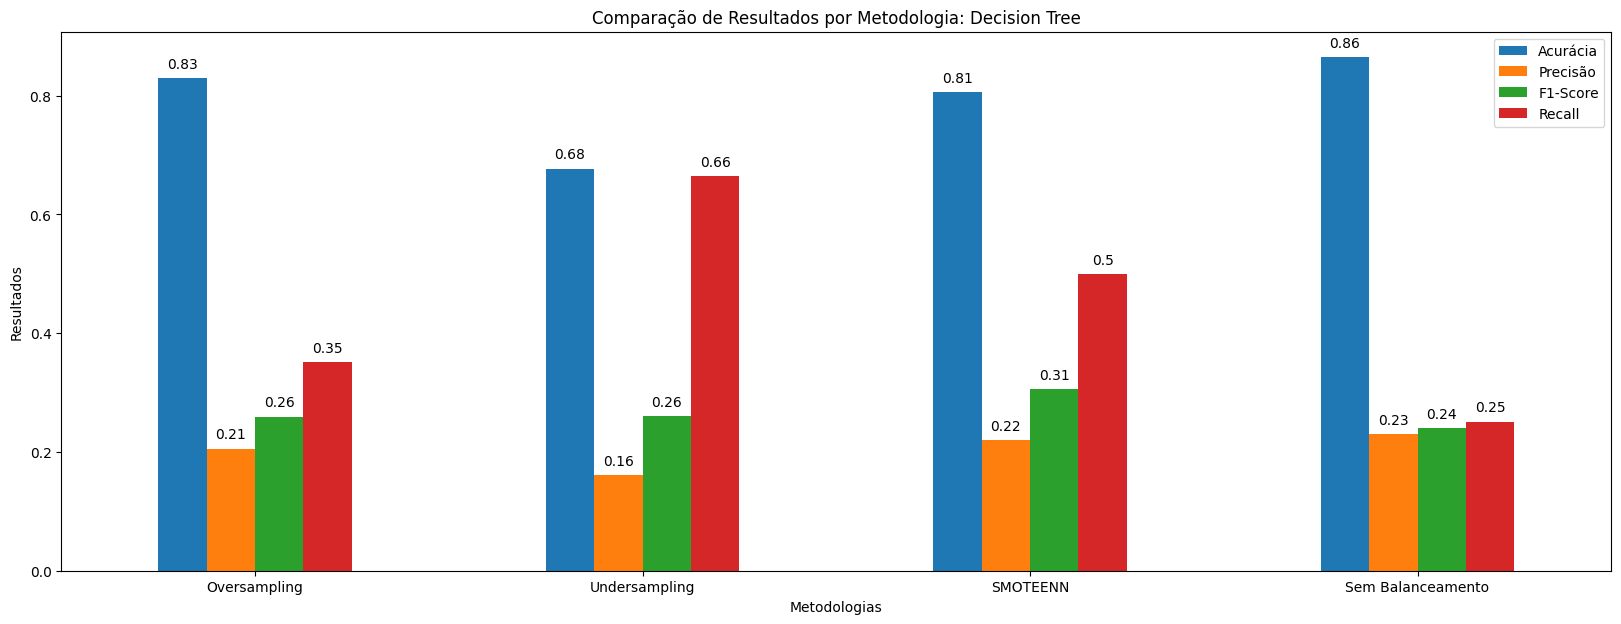

In [88]:
df_avaliacao_DT = pd.DataFrame()
df_avaliacao_DT['id'] = ['Acurácia', 'Precisão', 'F1-Score', 'Recall']
df_avaliacao_DT['Oversampling'] = list_results_DT_Oversampling
df_avaliacao_DT['Undersampling'] = list_results_DT_Undersampling
df_avaliacao_DT['SMOTEENN'] = list_results_DT_SMOTEENN
df_avaliacao_DT['Sem Balanceamento'] = list_results_DT_SemBal

df_avaliacao_DT.set_index('id',inplace=True)

df_transpose = df_avaliacao_DT.transpose()

ax = df_transpose.plot(kind='bar', figsize=(20, 7))
ax.legend(title='')
plt.title('Comparação de Resultados por Metodologia: Decision Tree')
plt.xlabel('Metodologias')
plt.ylabel('Resultados')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

## Avaliando o modelo Random Forest

### OVERSAMPLING

In [21]:
validacao_cruzada(classificador_RF, X_treino, y_treino, 'Oversampling')

Acurácia do split 0: 0.8584692172662479
Precisão do split 0: 0.2459595021363552
F1 do split 0: 0.28351177730192717
Recall do split 0: 0.3345969168562042

Acurácia do split 1: 0.8575386502548484
Precisão do split 1: 0.23826783670354826
F1 do split 1: 0.27052198397227634
Recall do split 1: 0.312875751503006

Acurácia do split 2: 0.85658693399319
Precisão do split 2: 0.24091246290801188
F1 do split 2: 0.2770018125599744
Recall do split 2: 0.3258088788562829

Acurácia do split 3: 0.8571156652496669
Precisão do split 3: 0.24346838318818628
F1 do split 3: 0.27572898799313894
Recall do split 3: 0.31784478497281266

Acurácia do split 4: 0.8559947549859358
Precisão do split 4: 0.23466716529543755
F1 do split 4: 0.2693422040991522
Recall do split 4: 0.3160412994208008



RandomForestClassifier()

In [46]:
print (f'A média da acurácia de 5-FOLD é de: {(0.8584692172662479 + 0.8575386502548484 +  0.85658693399319 + 0.8571156652496669 +  0.8559947549859358)/5}')
print (f'A média da precisão de 5-FOLD é de: {(0.2459595021363552 + 0.23826783670354826 +  0.24091246290801188 + 0.24346838318818628 + 0.23466716529543755)/5}')
print (f'A média de F1-score de 5-FOLD é de: {(0.28351177730192717 + 0.27052198397227634 +  0.2770018125599744 + 0.27572898799313894 + 0.2693422040991522)/5}')
print (f'A média de Recall de 5-FOLD é de: {(0.3345969168562042+ 0.312875751503006 +  0.3258088788562829 + 0.31784478497281266 + 0.3160412994208008)/5}')

A média da acurácia de 5-FOLD é de: 0.8571410443499777
A média da precisão de 5-FOLD é de: 0.24065507004630785
A média de F1-score de 5-FOLD é de: 0.2752213531852938
A média de Recall de 5-FOLD é de: 0.3214335263218214


In [90]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_treino, y_treino)

classificador_RF.fit(X_smote,y_smote)

pred = classificador_RF.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_RF_Oversampling = []
list_results_RF_Oversampling.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia de dados de teste: 0.8570413420297947
Precisão de dados de teste: 0.24980741718939145
F1-score de dados de teste: 0.2872326964443882
Recall de dados de teste: 0.33784789403185


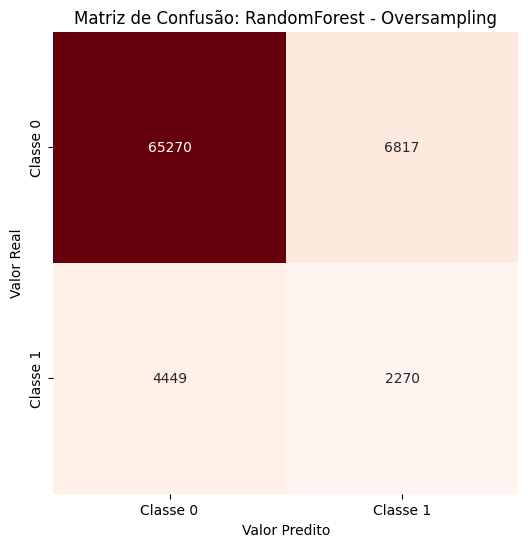

In [91]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: RandomForest - Oversampling')
plt.show()

In [92]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.33784789403185
Especificidade: 0.9054337120423932
Erro Tipo 1: 0.09456628795760678
Erro Tipo 2: 0.66215210596815


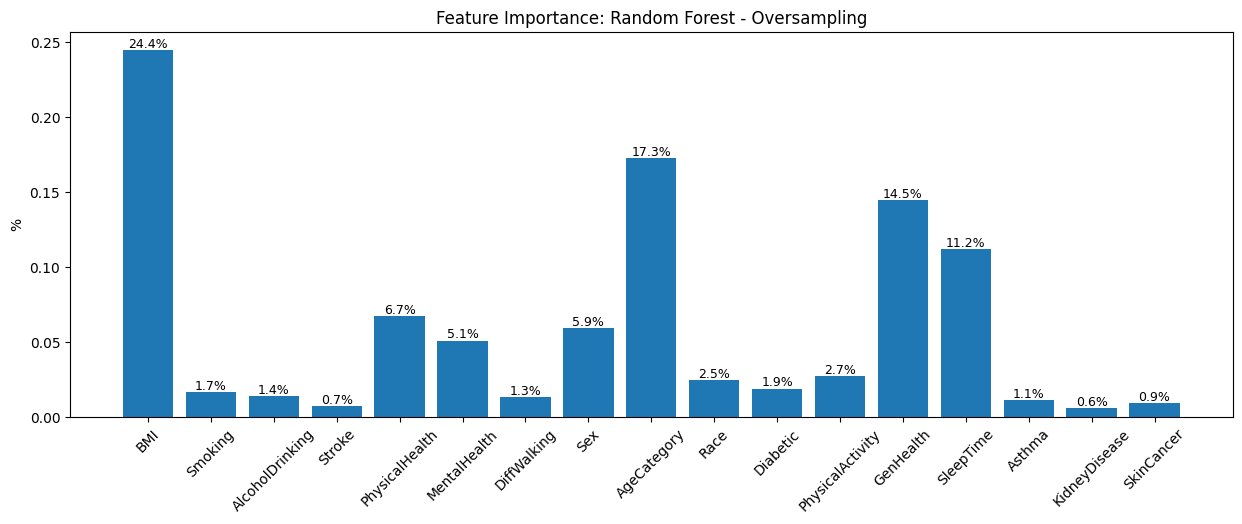

In [93]:
feature_importances = classificador_RF.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Random Forest - Oversampling')
plt.ylabel('%')
plt.show()

### UNDERSAMPLING

In [22]:
validacao_cruzada(classificador_RF, X_treino, y_treino, 'Undersampling')

Acurácia do split 0: 0.722394941099338
Precisão do split 0: 0.20073111821920492
F1 do split 0: 0.3190495953517327
Recall do split 0: 0.77710386656558

Acurácia do split 1: 0.726963179155299
Precisão do split 1: 0.20344506517690875
F1 do split 1: 0.32152617195711586
Recall do split 1: 0.7662825651302605

Acurácia do split 2: 0.715119599010215
Precisão do split 2: 0.1969319271332694
F1 do split 2: 0.3138753056234718
Recall do split 2: 0.7727614747930776

Acurácia do split 3: 0.7210836875832751
Precisão do split 3: 0.20291173794358508
F1 do split 3: 0.3213256484149856
Recall do split 3: 0.7716262975778547

Acurácia do split 4: 0.7179958970454497
Precisão do split 4: 0.20003844428781956
F1 do split 4: 0.3189294105628767
Recall do split 4: 0.7861999496348527



RandomForestClassifier()

In [55]:
print (f'A média da acurácia de 5-FOLD é de: {(0.722394941099338 + 0.726963179155299 +  0.715119599010215 + 0.7210836875832751 +  0.7179958970454497)/5}')
print (f'A média da precisão de 5-FOLD é de: {(0.20073111821920492 + 0.20344506517690875 +  0.1969319271332694 + 0.20291173794358508 + 0.20003844428781956)/5}')
print (f'A média de F1-score de 5-FOLD é de: {(0.3190495953517327 + 0.32152617195711586 +  0.3138753056234718 + 0.3213256484149856 + 0.3189294105628767)/5}')
print (f'A média de Recall de 5-FOLD é de: {(0.77710386656558+ 0.7662825651302605 +  0.7727614747930776 + 0.7716262975778547 +  0.7861999496348527)/5}')

A média da acurácia de 5-FOLD é de: 0.7207114607787153
A média da precisão de 5-FOLD é de: 0.20081165855215755
A média de F1-score de 5-FOLD é de: 0.31894122638203654
A média de Recall de 5-FOLD é de: 0.7747948307403251


In [94]:
under = RandomUnderSampler(random_state=42)
X_under, y_under = under.fit_resample(X_treino, y_treino)

classificador_RF.fit(X_under,y_under)

pred = classificador_RF.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_RF_Undersampling = []
list_results_RF_Undersampling.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia de dados de teste: 0.7187016217039311
Precisão de dados de teste: 0.20031037827352086
F1-score de dados de teste: 0.3177817443220287
Recall de dados de teste: 0.7684179193332341


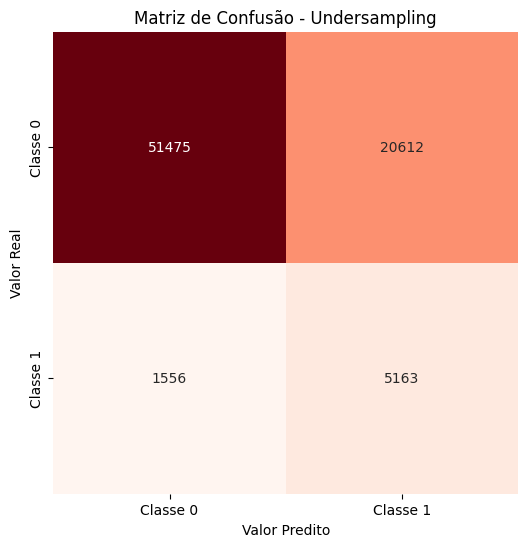

In [95]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Undersampling')
plt.show()

In [96]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.7684179193332341
Especificidade: 0.714067723722724
Erro Tipo 1: 0.2859322762772761
Erro Tipo 2: 0.2315820806667659


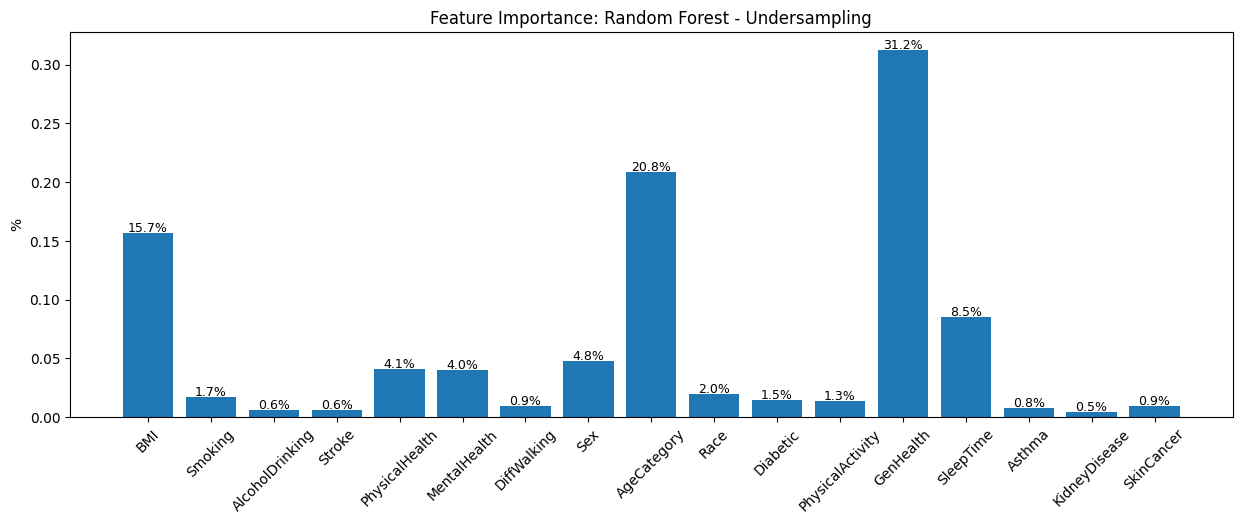

In [97]:
feature_importances = classificador_DT.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Random Forest - Undersampling')
plt.ylabel('%')
plt.show()

### SEM BALANCEAMENTO

In [23]:
validacao_cruzada(classificador_RF, X_treino, y_treino, 'None')

Acurácia do split 0: 0.9085717911300044
Precisão do split 0: 0.3480066445182724
F1 do split 0: 0.162371633404379
Recall do split 0: 0.10588829921657822

Acurácia do split 1: 0.9083180001268955
Precisão do split 1: 0.3611336032388664
F1 do split 1: 0.17065238186340156
Recall do split 1: 0.11172344689378758

Acurácia do split 2: 0.9086352388807817
Precisão do split 2: 0.37338403041825097
F1 do split 2: 0.18521312712184082
Recall do split 2: 0.12315023827439177

Acurácia do split 3: 0.9062665228517649
Precisão do split 3: 0.34968847352024923
F1 do split 3: 0.16848030018761728
Recall do split 3: 0.11097380128521997

Acurácia do split 4: 0.9080430598735275
Precisão do split 4: 0.35215686274509805
F1 do split 4: 0.17117804041174228
Recall do split 4: 0.1130697557290355



RandomForestClassifier()

In [61]:
print (f'A média da acurácia de 5-FOLD é de: {(0.9085717911300044 + 0.9083180001268955 +  0.9086352388807817 + 0.9062665228517649 +  0.9080430598735275)/5}')
print (f'A média da precisão de 5-FOLD é de: {(0.3480066445182724 + 0.3611336032388664 +  0.37338403041825097 + 0.34968847352024923 + 0.35215686274509805)/5}')
print (f'A média de F1-score de 5-FOLD é de: {(0.162371633404379 + 0.17065238186340156 +  0.18521312712184082 + 0.16848030018761728 + 0.17117804041174228)/5}')
print (f'A média de Recall de 5-FOLD é de: {(0.10588829921657822 + 0.11172344689378758 + 0.12315023827439177 + 0.11097380128521997 + 0.1130697557290355)/5}')

A média da acurácia de 5-FOLD é de: 0.9079669225725947
A média da precisão de 5-FOLD é de: 0.35687392288814734
A média de F1-score de 5-FOLD é de: 0.1715790965977962
A média de Recall de 5-FOLD é de: 0.11296110827980262


In [98]:
classificador_RF.fit(X_treino,y_treino)

pred = classificador_RF.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_RF_SemBal = []
list_results_RF_SemBal.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia de dados de teste: 0.9058954901911022
Precisão de dados de teste: 0.3460008837825895
F1-score de dados de teste: 0.1743486973947896
Recall de dados de teste: 0.1165351986902813


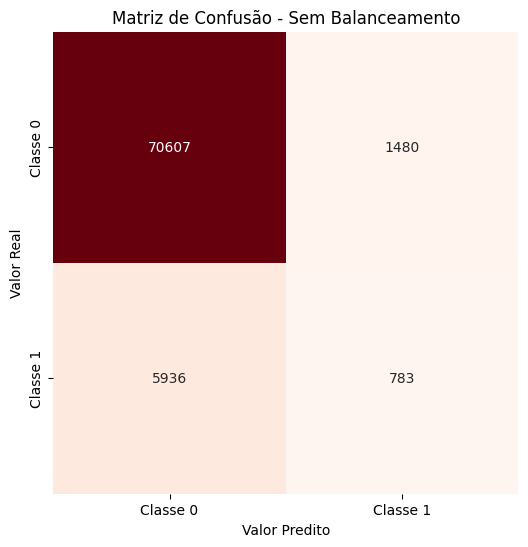

In [99]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - Sem Balanceamento')
plt.show()

In [100]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.1165351986902813
Especificidade: 0.9794692524310902
Erro Tipo 1: 0.02053074756890979
Erro Tipo 2: 0.8834648013097187


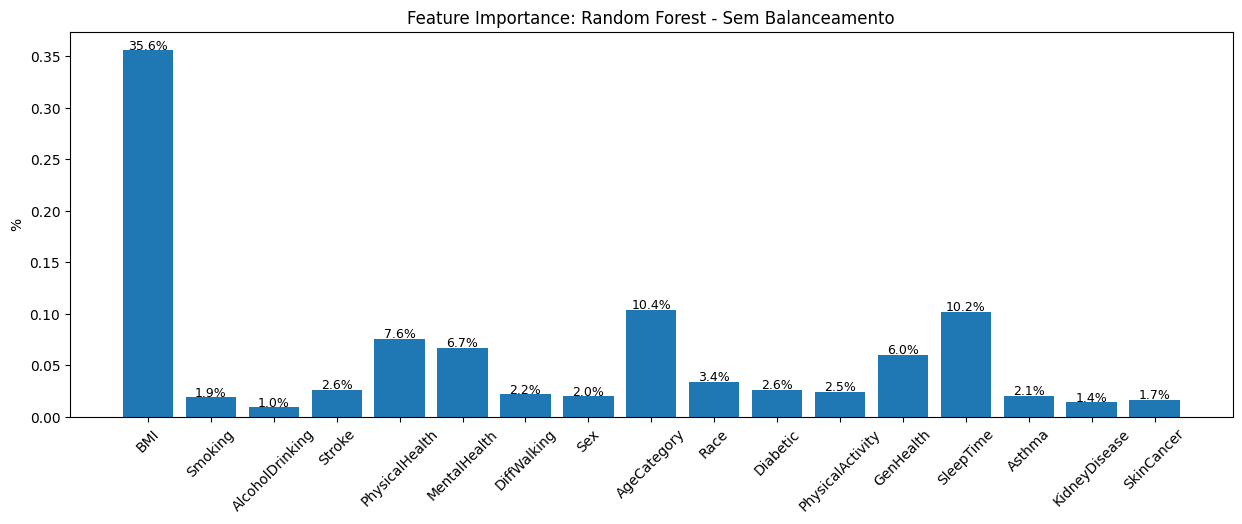

In [101]:
feature_importances = classificador_RF.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Random Forest - Sem Balanceamento')
plt.ylabel('%')
plt.show()

### SMOTEENN

In [24]:
validacao_cruzada(classificador_RF, X_treino, y_treino, 'SMOTEENN')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 0: 0.8248419093543133
Precisão do split 0: 0.2504327755337565
F1 do split 0: 0.3438440817620028
Recall do split 0: 0.548395248925954



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 1: 0.824989954106127
Precisão do split 1: 0.25274217757764694
F1 do split 1: 0.3460049000237098
Recall do split 1: 0.5483466933867736



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 2: 0.8221982530719286
Precisão do split 2: 0.2496601721794291
F1 do split 2: 0.34397190792040583
Recall do split 2: 0.5527965889139704



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 3: 0.8247150138527589
Precisão do split 3: 0.25365853658536586
F1 do split 3: 0.34513274336283184
Recall do split 3: 0.5397923875432526



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 4: 0.8230019245817736
Precisão do split 4: 0.25051055139550715
F1 do split 4: 0.3454047712162691
Recall do split 4: 0.5560312263913372



RandomForestClassifier()

In [67]:
print (f'A média da acurácia de 5-FOLD é de: {(0.8248419093543133 + 0.824989954106127 +  0.8221982530719286 + 0.8247150138527589 +  0.8230019245817736)/5}')
print (f'A média da precisão de 5-FOLD é de: {(0.2504327755337565 + 0.25274217757764694 +  0.2496601721794291 + 0.25365853658536586 + 0.25051055139550715)/5}')
print (f'A média de F1-score de 5-FOLD é de: {(0.3438440817620028 + 0.3460049000237098 +  0.34397190792040583 + 0.34513274336283184 + 0.3454047712162691)/5}')
print (f'A média de Recall de 5-FOLD é de: {(0.548395248925954 + 0.5483466933867736 + 0.5527965889139704 + 0.5397923875432526 + 0.5560312263913372)/5}')

A média da acurácia de 5-FOLD é de: 0.8239494109933803
A média da precisão de 5-FOLD é de: 0.2514008426543411
A média de F1-score de 5-FOLD é de: 0.3448716808570439
A média de Recall de 5-FOLD é de: 0.5490724290322576


In [102]:
smoteenn = SMOTEENN(random_state=42, sampling_strategy=0.5, n_jobs=-1)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_treino, y_treino)

classificador_RF.fit(X_smoteenn,y_smoteenn)

pred = classificador_RF.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_RF_SMOTEENN = []
list_results_RF_SMOTEENN.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia de dados de teste: 0.8258635129304875
Precisão de dados de teste: 0.256636553161918
F1-score de dados de teste: 0.34989814770950783
Recall de dados de teste: 0.5496353624051198


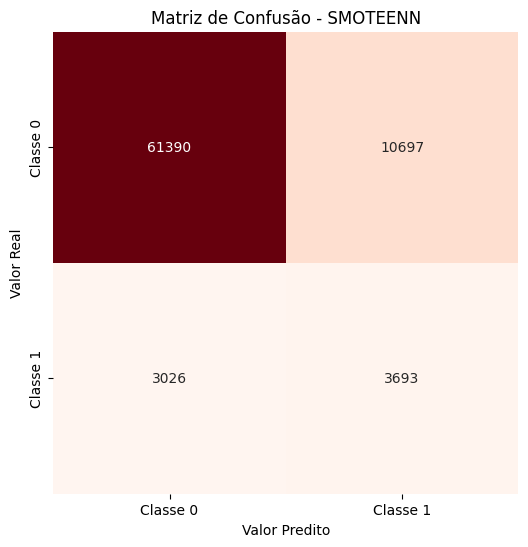

In [103]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão - SMOTEENN')
plt.show()

In [104]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.5496353624051198
Especificidade: 0.8516098603076838
Erro Tipo 1: 0.14839013969231624
Erro Tipo 2: 0.4503646375948802


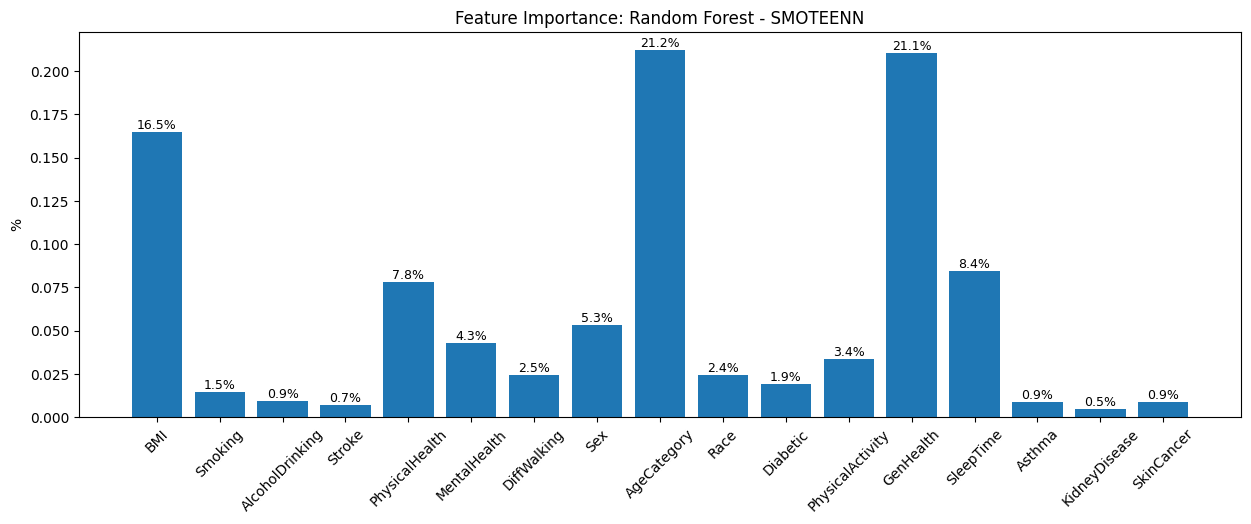

In [105]:
feature_importances = classificador_RF.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,5))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: Random Forest - SMOTEENN')
plt.ylabel('%')
plt.show()

### Avaliação Final Random Forest

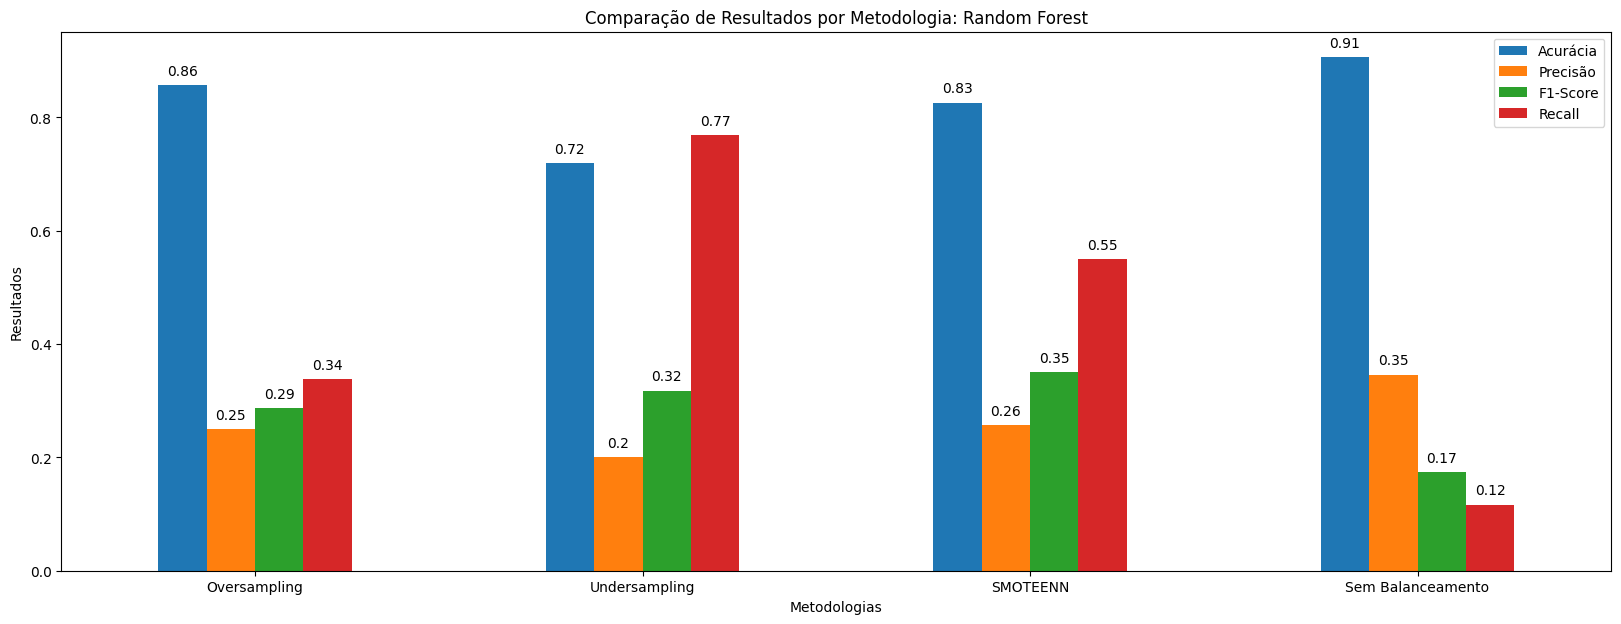

In [106]:
df_avaliacao_RF = pd.DataFrame()
df_avaliacao_RF['id'] = ['Acurácia', 'Precisão', 'F1-Score', 'Recall']
df_avaliacao_RF['Oversampling'] = list_results_RF_Oversampling
df_avaliacao_RF['Undersampling'] = list_results_RF_Undersampling
df_avaliacao_RF['SMOTEENN'] = list_results_RF_SMOTEENN
df_avaliacao_RF['Sem Balanceamento'] = list_results_RF_SemBal

df_avaliacao_RF.set_index('id',inplace=True)

df_transpose = df_avaliacao_RF.transpose()

ax = df_transpose.plot(kind='bar', figsize=(20, 7))
ax.legend(title='')
plt.title('Comparação de Resultados por Metodologia: Random Forest')
plt.xlabel('Metodologias')
plt.ylabel('Resultados')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

## Avaliação o modelo XGBOOST

### OVERSAMPING

In [25]:
validacao_cruzada(classificador_XGB, X_treino, y_treino, 'Oversampling')

Acurácia do split 0: 0.8310174904299643
Precisão do split 0: 0.23849046816236547
F1 do split 0: 0.31522111758656157
Recall do split 0: 0.46474601971190294

Acurácia do split 1: 0.8308694456781507
Precisão do split 1: 0.2431704501731435
F1 do split 1: 0.3216557808126219
Recall do split 1: 0.4749498997995992

Acurácia do split 2: 0.8291352071569063
Precisão do split 2: 0.23822927328556806
F1 do split 2: 0.31551300516817754
Recall do split 2: 0.46701780787559566

Acurácia do split 3: 0.8303407144216738
Precisão do split 3: 0.2396542692509167
F1 do split 3: 0.3133025166923472
Recall do split 3: 0.4522985664854177

Acurácia do split 4: 0.8298965801662331
Precisão do split 4: 0.24305906108026248
F1 do split 4: 0.3238335435056746
Recall do split 4: 0.4850163686728784



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
print (f'A média da acurácia de 5-FOLD é de: {(0.8310174904299643 + 0.8308694456781507 +  0.8291352071569063 + 0.8303407144216738 +  0.8298965801662331)/5}')
print (f'A média da precisão de 5-FOLD é de: {(0.23849046816236547 + 0.2431704501731435 +  0.23822927328556806 + 0.2396542692509167 + 0.24305906108026248)/5}')
print (f'A média de F1-score de 5-FOLD é de: {(0.31522111758656157 + 0.3216557808126219 +  0.31551300516817754 + 0.3133025166923472 + 0.3238335435056746)/5}')
print (f'A média de Recall de 5-FOLD é de: {(0.46474601971190294+ 0.4749498997995992 +  0.46701780787559566 + 0.4522985664854177 + 0.4850163686728784)/5}')

A média da acurácia de 5-FOLD é de: 0.8302518875705858
A média da precisão de 5-FOLD é de: 0.24052070439045123
A média de F1-score de 5-FOLD é de: 0.3179051927530766
A média de Recall de 5-FOLD é de: 0.46880573250907875


In [107]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_treino, y_treino)

classificador_XGB.fit(X_smote,y_smote)

pred = classificador_XGB.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_XGB_Oversampling = []
list_results_XGB_Oversampling.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

Acurácia de dados de teste: 0.8292769586072126
Precisão de dados de teste: 0.24575311438278596
F1-score de dados de teste: 0.32608695652173914
Recall de dados de teste: 0.4844470903408245


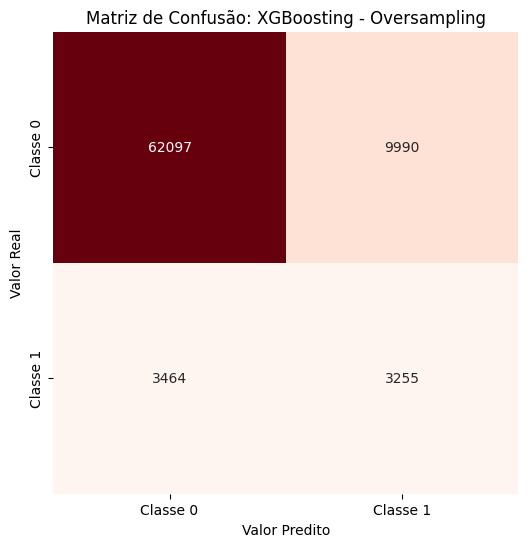

In [108]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: XGBoosting - Oversampling')
plt.show()

In [109]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.4844470903408245
Especificidade: 0.8614174539098589
Erro Tipo 1: 0.1385825460901411
Erro Tipo 2: 0.5155529096591754


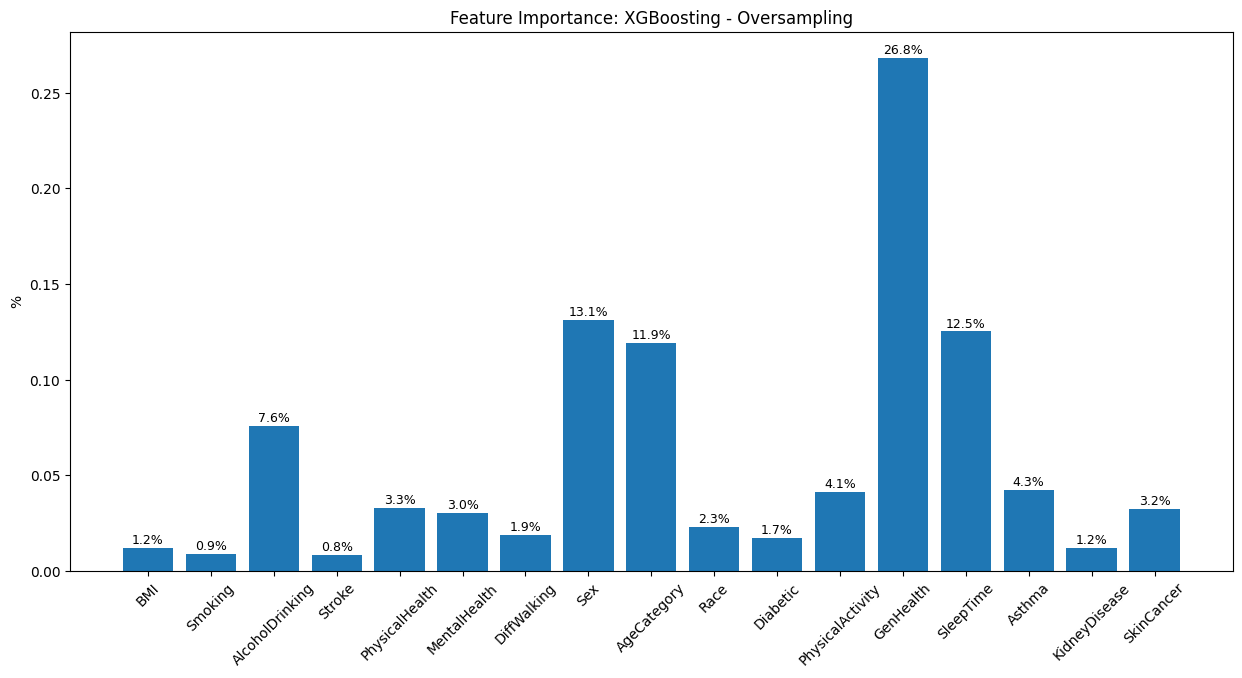

In [110]:
feature_importances = classificador_XGB.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,7))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: XGBoosting - Oversampling')
plt.ylabel('%')
plt.show()

### UNDERSAMPLING

In [26]:
validacao_cruzada(classificador_XGB, X_treino, y_treino, 'Undersampling')

Acurácia do split 0: 0.7297125816889791
Precisão do split 0: 0.2054483541430193
F1 do split 0: 0.3250237667687757
Recall do split 0: 0.7776092999747283

Acurácia do split 1: 0.7400968635661865
Precisão do split 1: 0.2149776709034696
F1 do split 1: 0.3374130587156952
Recall do split 1: 0.783817635270541

Acurácia do split 2: 0.7277668506651439
Precisão do split 2: 0.2082868211964016
F1 do split 2: 0.33014154870940887
Recall do split 2: 0.7955856533734638

Acurácia do split 3: 0.732398536471882
Precisão do split 3: 0.21327203677793324
F1 do split 3: 0.3359748097612175
Recall do split 3: 0.7911517548195749

Acurácia do split 4: 0.7271535224076306
Precisão do split 4: 0.20816993464052289
F1 do split 4: 0.33054849255357793
Recall do split 4: 0.8020649710400403



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
print (f'A média da acurácia de 5-FOLD é de: {(0.7297125816889791 + 0.7400968635661865 +  0.7277668506651439 + 0.732398536471882 +  0.7271535224076306)/5}')
print (f'A média da precisão de 5-FOLD é de: {(0.2054483541430193 + 0.2149776709034696 +  0.2082868211964016 + 0.21327203677793324 + 0.20816993464052289)/5}')
print (f'A média de F1-score de 5-FOLD é de: {(0.3250237667687757 + 0.3374130587156952 +  0.33014154870940887 + 0.3359748097612175 + 0.33054849255357793)/5}')
print (f'A média de Recall de 5-FOLD é de: {(0.7776092999747283+ 0.783817635270541 +  0.7955856533734638 + 0.7911517548195749 + 0.8020649710400403)/5}')

A média da acurácia de 5-FOLD é de: 0.7314256709599645
A média da precisão de 5-FOLD é de: 0.21003096353226933
A média de F1-score de 5-FOLD é de: 0.33182033530173505
A média de Recall de 5-FOLD é de: 0.7900458628956697


In [111]:
under = RandomUnderSampler(random_state=42)
X_under, y_under = under.fit_resample(X_treino, y_treino)

classificador_XGB.fit(X_under,y_under)

pred = classificador_XGB.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_XGB_Undersampling = []
list_results_XGB_Undersampling.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

Acurácia de dados de teste: 0.7322538892977692
Precisão de dados de teste: 0.21298846445535466
F1-score de dados de teste: 0.33589323933022786
Recall de dados de teste: 0.7941657984819169


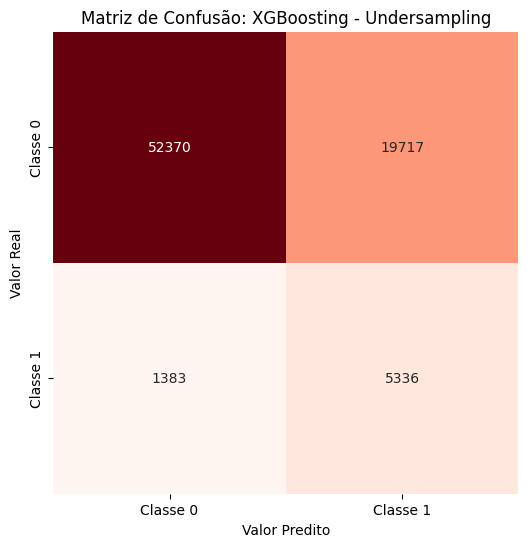

In [112]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: XGBoosting - Undersampling')
plt.show()

In [113]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.7941657984819169
Especificidade: 0.7264832771512201
Erro Tipo 1: 0.2735167228487799
Erro Tipo 2: 0.20583420151808304


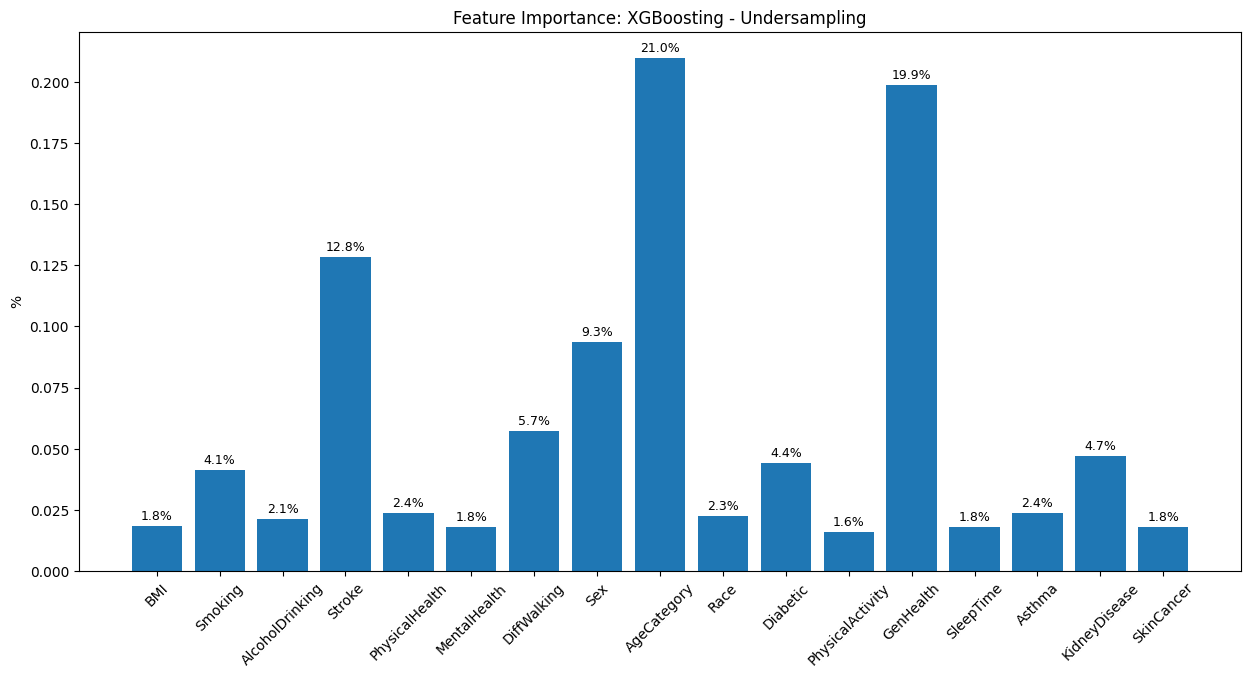

In [114]:
feature_importances = classificador_XGB.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,7))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: XGBoosting - Undersampling')
plt.ylabel('%')
plt.show()

### SEM BALANCEAMENTO

In [27]:
validacao_cruzada(classificador_XGB, X_treino, y_treino, 'None')

Acurácia do split 0: 0.9161220734724954
Precisão do split 0: 0.49363507779349364
F1 do split 0: 0.14965694682675815
Recall do split 0: 0.08819812989638615

Acurácia do split 1: 0.9156779392170548
Precisão do split 1: 0.5034106412005457
F1 do split 1: 0.15619047619047619
Recall do split 1: 0.09243486973947895

Acurácia do split 2: 0.9161855212232727
Precisão do split 2: 0.5159151193633952
F1 do split 2: 0.16410040075933346
Recall do split 2: 0.09756709305242037

Acurácia do split 3: 0.9140917454476238
Precisão do split 3: 0.4899749373433584
F1 do split 3: 0.16143682906688686
Recall do split 3: 0.09663865546218488

Acurácia do split 4: 0.9166719539792314
Precisão do split 4: 0.5206391478029294
F1 do split 4: 0.16560779330792036
Recall do split 4: 0.0984638630067993



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
print (f'A média da acurácia de 5-FOLD é de: {(0.9161220734724954 + 0.9156779392170548 +  0.9161855212232727 + 0.9140917454476238 +  0.9166719539792314)/5}')
print (f'A média da precisão de 5-FOLD é de: {(0.49363507779349364 + 0.5034106412005457 +  0.5159151193633952 + 0.4899749373433584 + 0.5206391478029294)/5}')
print (f'A média de F1-score de 5-FOLD é de: {(0.14965694682675815 + 0.15619047619047619 +  0.16410040075933346 + 0.16143682906688686 +0.16560779330792036)/5}')
print (f'A média de Recall de 5-FOLD é de: {(0.08819812989638615+ 0.09243486973947895+  0.09756709305242037 + 0.09663865546218488 + 0.0984638630067993)/5}')

A média da acurácia de 5-FOLD é de: 0.9157498466679357
A média da precisão de 5-FOLD é de: 0.5047149847007446
A média de F1-score de 5-FOLD é de: 0.15939848923027503
A média de Recall de 5-FOLD é de: 0.09466052223145394


In [115]:
classificador_XGB.fit(X_treino,y_treino)

pred = classificador_XGB.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_XGB_SemBal = []
list_results_XGB_SemBal.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

Acurácia de dados de teste: 0.9159708651625511
Precisão de dados de teste: 0.5407905803195963
F1-score de dados de teste: 0.1626201315123925
Recall de dados de teste: 0.09569876469712754


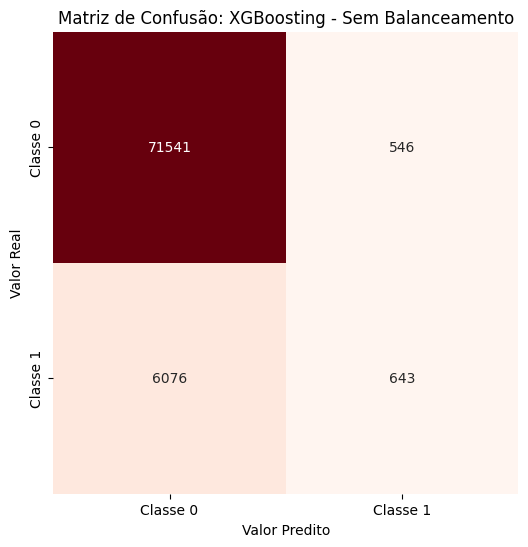

In [116]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: XGBoosting - Sem Balanceamento')
plt.show()

In [117]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.09569876469712754
Especificidade: 0.9924258188022805
Erro Tipo 1: 0.007574181197719423
Erro Tipo 2: 0.9043012353028724


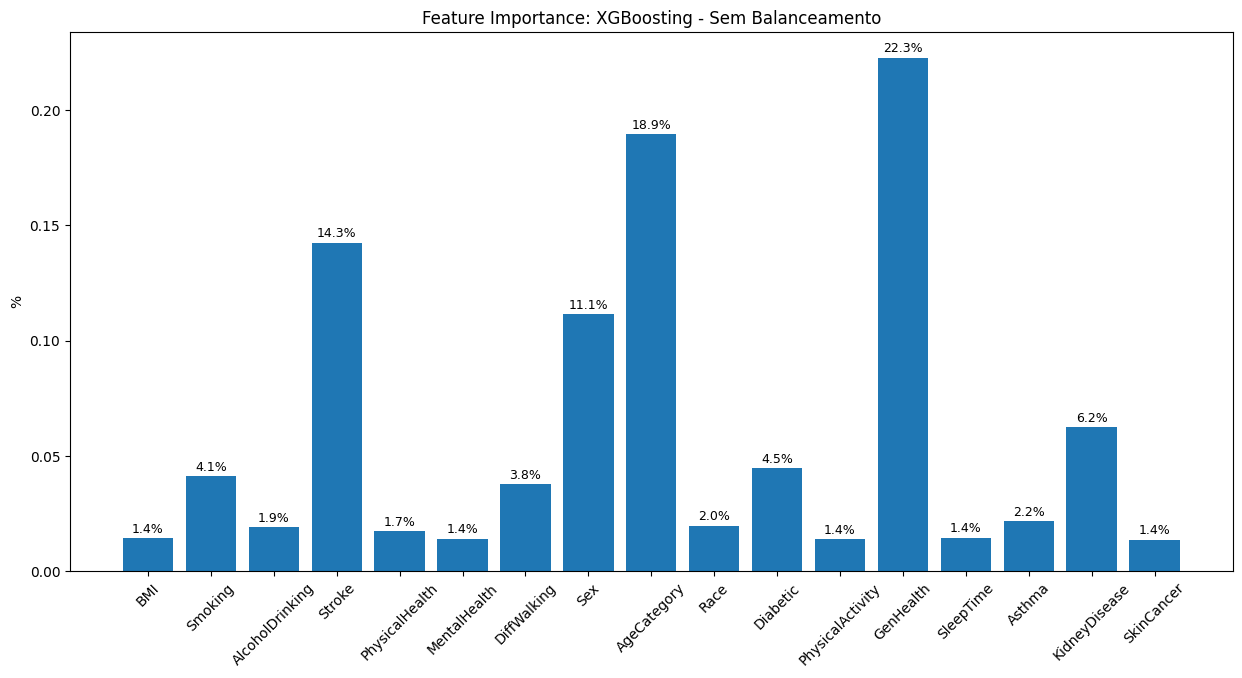

In [118]:
feature_importances = classificador_XGB.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,7))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: XGBoosting - Sem Balanceamento')
plt.ylabel('%')
plt.show()

### SMOTEENN

In [28]:
validacao_cruzada(classificador_XGB, X_treino, y_treino, 'SMOTEENN')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 0: 0.8303195651714147
Precisão do split 0: 0.26294309701492535
F1 do split 0: 0.3598499960105322
Recall do split 0: 0.5698761688147587



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 1: 0.8314404754351459
Precisão do split 1: 0.2679654689687354
F1 do split 1: 0.36564788283985994
Recall do split 1: 0.5754008016032064



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 2: 0.8277393566398071
Precisão do split 2: 0.2650316455696203
F1 do split 2: 0.36540708998831317
Recall do split 2: 0.5881615249561073



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 3: 0.830129221919083
Precisão do split 3: 0.26911492122335495
F1 do split 3: 0.36646158700110426
Recall do split 3: 0.574147305981216



c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia do split 4: 0.8294947444113107
Precisão do split 4: 0.2665220865198037
F1 do split 4: 0.3667923342758404
Recall do split 4: 0.5880130949383027



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
print (f'A média da acurácia de 5-FOLD é de: {(0.8303195651714147 + 0.8314404754351459 +  0.8277393566398071 + 0.830129221919083 +  0.8294947444113107)/5}')
print (f'A média da precisão de 5-FOLD é de: {(0.26294309701492535 + 0.2679654689687354 +  0.2650316455696203 + 0.26911492122335495 + 0.2665220865198037)/5}')
print (f'A média de F1-score de 5-FOLD é de: {(0.3598499960105322 + 0.36564788283985994 +  0.36540708998831317 + 0.36646158700110426 +0.3667923342758404)/5}')
print (f'A média de Recall de 5-FOLD é de: {(0.5698761688147587+ 0.5754008016032064+  0.5881615249561073 + 0.574147305981216 + 0.5880130949383027)/5}')

A média da acurácia de 5-FOLD é de: 0.8298246727153522
A média da precisão de 5-FOLD é de: 0.26631544385928796
A média de F1-score de 5-FOLD é de: 0.36483177802313
A média de Recall de 5-FOLD é de: 0.5791197792587182


In [119]:
smoteenn = SMOTEENN(random_state=42, sampling_strategy=0.5, n_jobs=-1)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_treino, y_treino)

classificador_XGB.fit(X_smoteenn,y_smoteenn)

pred = classificador_XGB.predict(X_teste)

acuracia = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)
recall = recall_score(y_test,pred)

list_results_XGB_SMOTEENN = []
list_results_XGB_SMOTEENN.extend([acuracia,precision,f1,recall])

print(f'Acurácia de dados de teste: {acuracia}')
print(f'Precisão de dados de teste: {precision}')
print(f'F1-score de dados de teste: {f1}')
print(f'Recall de dados de teste: {recall}')

c:\Users\usuario\Documents\12° SEMESTRE\TCC2\.tcc\Lib\site-packages\imblearn\over_sampling\_smote\base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Acurácia de dados de teste: 0.8337816917493592
Precisão de dados de teste: 0.2750035265904923
F1-score de dados de teste: 0.3731636120017227
Recall de dados de teste: 0.5802946867093317


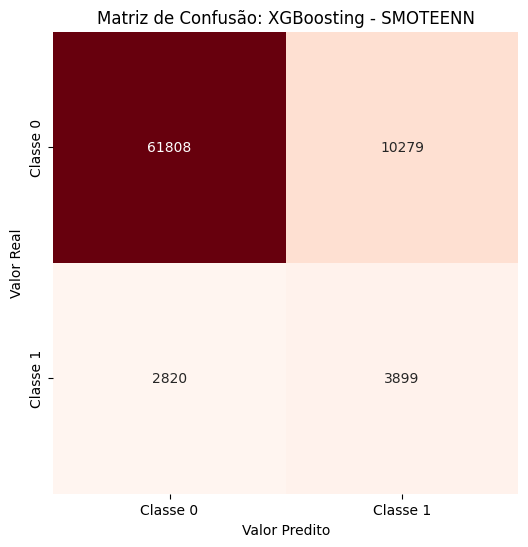

In [120]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão: XGBoosting - SMOTEENN')
plt.show()

In [121]:
TN, FP, FN, TP = cm.ravel()

sensibilidade = TP / (TP + FN)
especificidade = TN / (FP + TN)
erro_tipo_1 = FP / (FP + TN)
erro_tipo_2 = FN / (TP + FN)


print(f'Sensibilidade: {sensibilidade}')
print(f'Especificidade: {especificidade}')
print(f'Erro Tipo 1: {erro_tipo_1}')
print(f'Erro Tipo 2: {erro_tipo_2}')

Sensibilidade: 0.5802946867093317
Especificidade: 0.8574084092832273
Erro Tipo 1: 0.1425915907167728
Erro Tipo 2: 0.41970531329066824


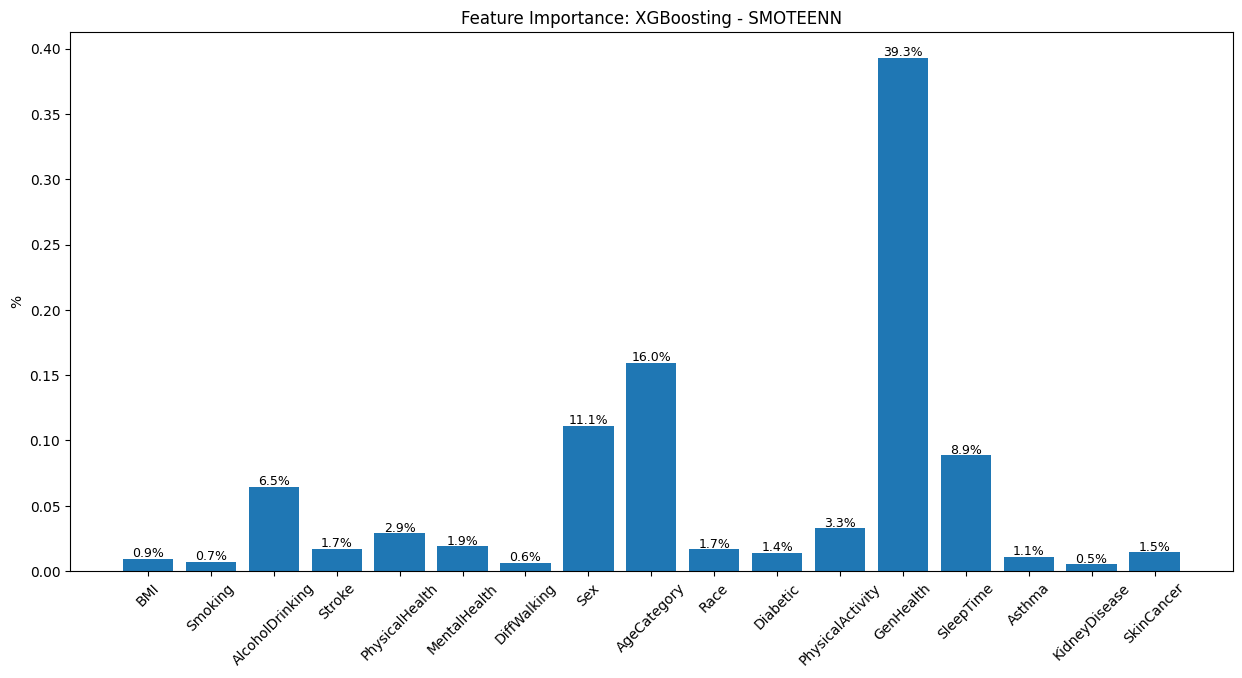

In [122]:
feature_importances = classificador_XGB.feature_importances_
feature_names = X.columns

plt.figure(figsize=(15,7))
plt.bar(feature_names,feature_importances)

for i, v in enumerate(feature_importances):
    plt.text(i, v + 0.004, str(round(v*100, 1))+'%', ha='center', va='center', fontsize=9)

plt.xticks(rotation=45)
plt.title('Feature Importance: XGBoosting - SMOTEENN')
plt.ylabel('%')
plt.show()

### Avaliação Final: XGBOOSTING

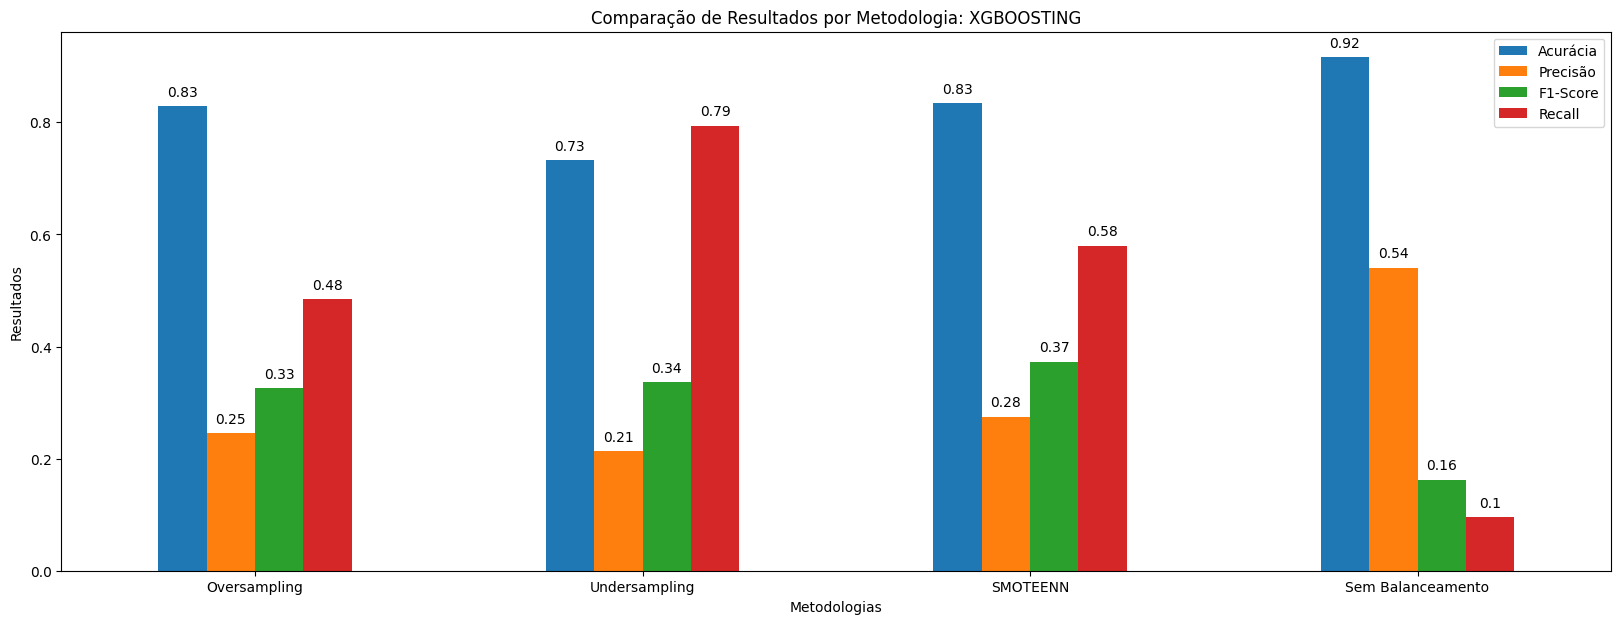

In [123]:
df_avaliacao_XGB = pd.DataFrame()
df_avaliacao_XGB['id'] = ['Acurácia', 'Precisão', 'F1-Score', 'Recall']
df_avaliacao_XGB['Oversampling'] = list_results_XGB_Oversampling
df_avaliacao_XGB['Undersampling'] = list_results_XGB_Undersampling
df_avaliacao_XGB['SMOTEENN'] = list_results_XGB_SMOTEENN
df_avaliacao_XGB['Sem Balanceamento'] = list_results_XGB_SemBal

df_avaliacao_XGB.set_index('id',inplace=True)

df_transpose = df_avaliacao_XGB.transpose()

ax = df_transpose.plot(kind='bar', figsize=(20, 7))
ax.legend(title='')
plt.title('Comparação de Resultados por Metodologia: XGBOOSTING')
plt.xlabel('Metodologias')
plt.ylabel('Resultados')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()